In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
# Task1: Data Preparation and Exploration
# Read data from the csv file and create a dataframe
df = pd.read_csv('Employee_Performance.csv')

In [3]:
# Task1: Data Preparation and Exploration
# Handling Duplicates

# Find duplicates based on all columns
duplicates = df.duplicated(keep=False)
print("\n---Duplicate rows:")
print(df[duplicates])

# Num of duplicates
num_duplicates = duplicates.sum()
print("\n---Number of duplicates:", num_duplicates)

# Percentage of duplicates
total_rows = len(df)
percent_duplicates = (num_duplicates / total_rows)
print("\n---Percentage of duplicates:", percent_duplicates, "%")


---Duplicate rows:
Empty DataFrame
Columns: [EmployeeID, Department, Gender, Experience, TrainingHours, PerformanceRating, Salary]
Index: []

---Number of duplicates: 0

---Percentage of duplicates: 0.0 %



---Box plot for Numerical columns:


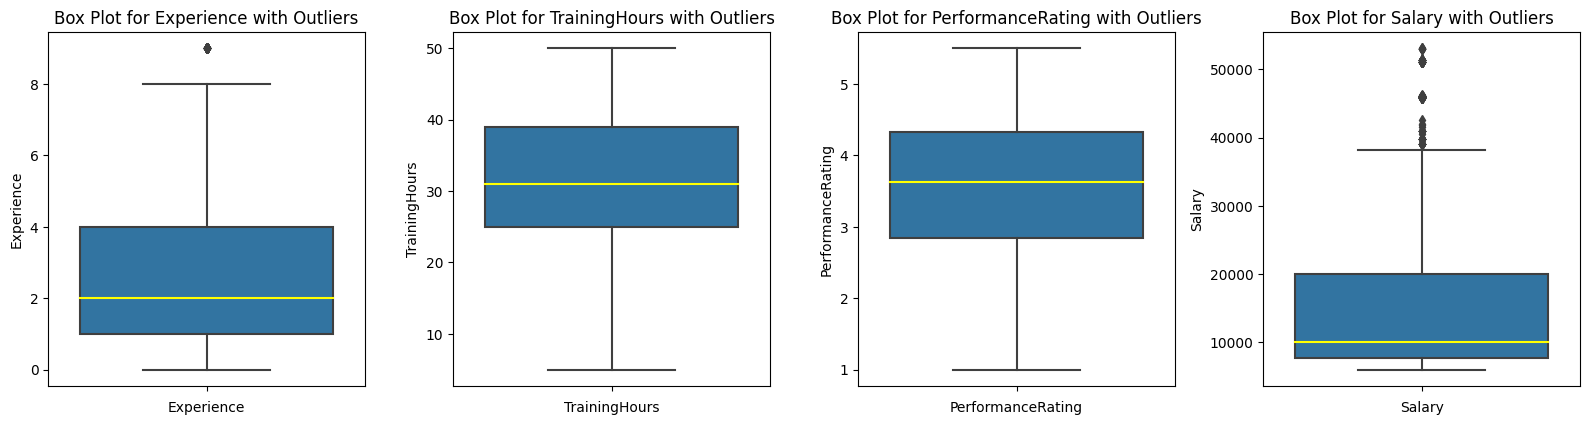


---Sum of Outliers:
 Experience            61
TrainingHours          0
PerformanceRating      0
Salary               152
dtype: int64

---Columns with Outliers:
['Experience', 'Salary']

---Scatter plot for Numerical columns with outliers:


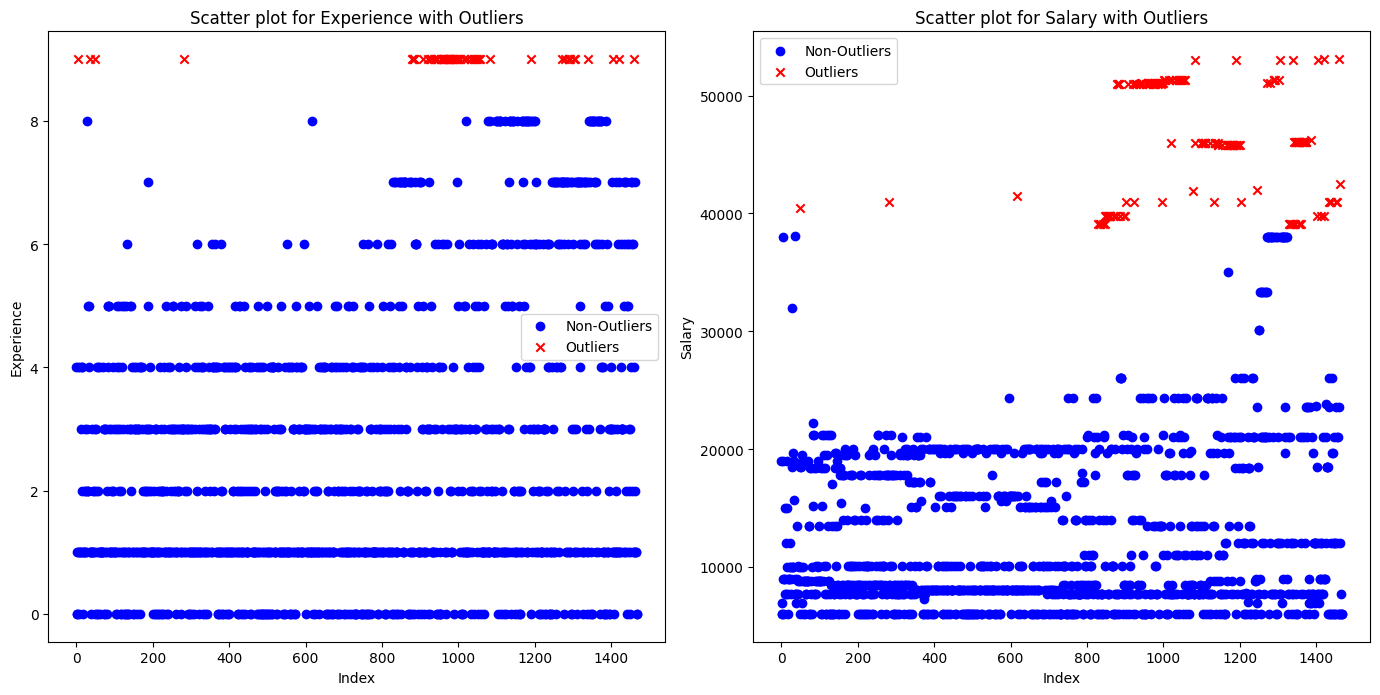

In [4]:
# Task1: Data Preparation and Exploration
# Handling Outliers:

# Identify numeric columns for outlier detection
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Box plot for all Numerical columns
print("\n---Box plot for Numerical columns:")
plt.figure(figsize=(16,16))

exclude_col = ['EmployeeID']
numerical_cols = [col for col in numerical_cols if col not in exclude_col]

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y = df[col], medianprops={"color": "yellow"})
    plt.xlabel(col)
    plt.title(f'Box Plot for {col} with Outliers') 
plt.tight_layout()
plt.show()

# Calculate the IQR for each numeric column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers as values beyond the lower and upper bounds (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier detection
outlier_mask = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))

num_outliers = outlier_mask.sum()
print("\n---Sum of Outliers:\n", num_outliers)

outlier_cols = [col for col, num in num_outliers.items() if num > 0]
print("\n---Columns with Outliers:")
print(outlier_cols)

# Visualize Outliers
# Scatter plot for Numerical columns with Outliers
print("\n---Scatter plot for Numerical columns with outliers:")
plt.figure(figsize=(28,20))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(3, 4, i)
    plt.scatter(df.index[~outlier_mask[col]], df[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    
plt.tight_layout()
plt.show()

In [5]:
# Task1: Data Preparation and Exploration
# Handling Missing Values:

# Number of missing values in each column
num_missing = df.isnull().sum()
print("\n---Number of Missing Values:")
print(num_missing)

# Percentage of missing values in each column
percent_missing = (num_missing / total_rows) * 100
print("\n---Percentage of Missing Values:")
print(round(percent_missing, 2), "%")


---Number of Missing Values:
EmployeeID           0
Department           0
Gender               0
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               0
dtype: int64

---Percentage of Missing Values:
EmployeeID           0.0
Department           0.0
Gender               0.0
Experience           0.0
TrainingHours        0.0
PerformanceRating    0.0
Salary               0.0
dtype: float64 %


In [6]:
# Task1: Data Preparation and Exploration

# Display characterisitcs of dataset  
print("\n---Dataset's Info:")
print(df.info())

print("\n---Dataset's Shape:")
print(df.shape)

print("\n---Dataset's First few rows:")
print(df.head())

# Set theme
sns.set(style="darkgrid")
# Generate Summary Statistics
print("\n---Summary Statistics:")
df.describe()


---Dataset's Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None

---Dataset's Shape:
(1468, 7)

---Dataset's First few rows:
   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5  

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1734.500000,2.838556,32.144414,3.561512,16107.623297
std,423.919411,2.527657,10.106029,1.044987,12158.438481
min,1001.000000,0.000000,5.000000,1.000000,6000.000000
25%,1367.750000,1.000000,25.000000,2.840000,7700.000000
50%,1734.500000,2.000000,31.000000,3.630000,10100.000000
75%,2101.250000,4.000000,39.000000,4.330000,20000.000000
max,2468.000000,9.000000,50.000000,5.500000,53100.000000


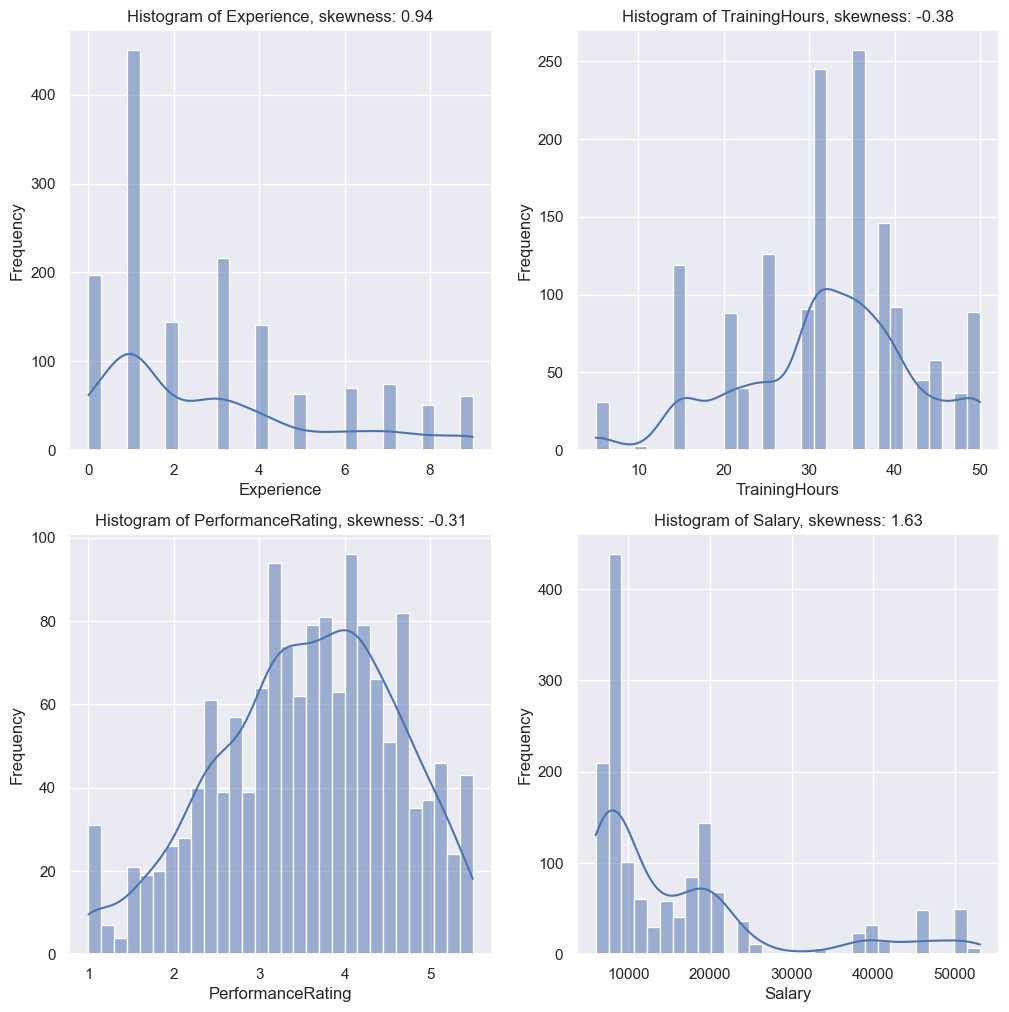

In [7]:
# Task1: Data Preparation and Exploration
# Data Distribution

# Histograms of Numerical Columns
plt.figure(figsize=(12,12))
for i, col in enumerate(numerical_cols, 1):
    skewness = stats.skew(df[col])
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins = 30, kde = True)
    plt.title(f'Histogram of {col}, skewness: {skewness:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


---Pie charts of Categorical Columns


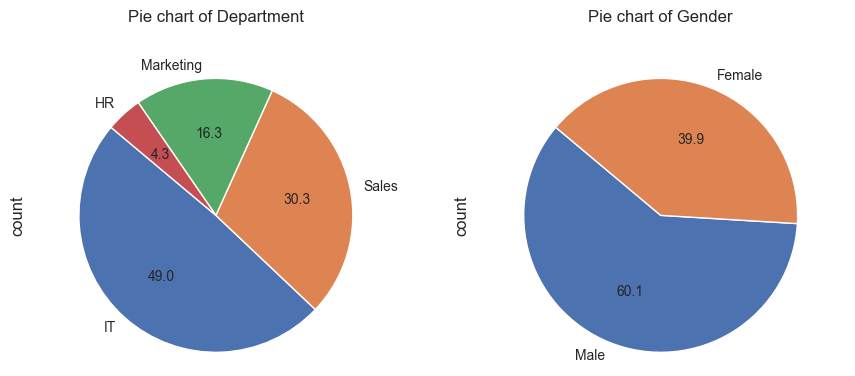

In [8]:
# Task1: Data Preparation and Exploration
# Data Distribution

# Pie charts of Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n---Pie charts of Categorical Columns")
for i, col in enumerate(categorical_cols):
    Counts = df[col].value_counts()
    plt.subplot(4, 4, i+1)
    df[col].value_counts().plot.pie(labels=Counts.index, fontsize=10, figsize=(22,18), autopct="%.1f", startangle=140)
    plt.title(f'Pie chart of {col}\n\n')
    plt.axis('equal')

plt.show()

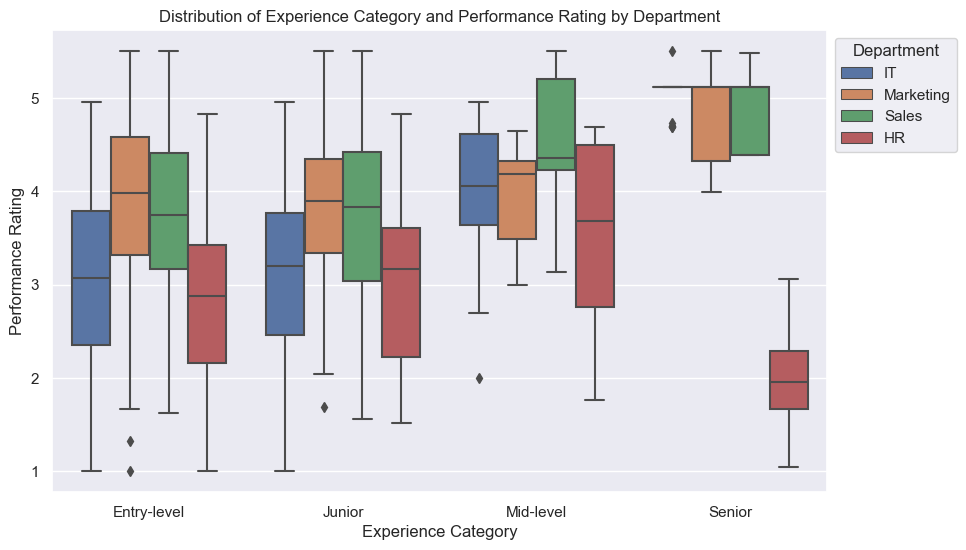

In [9]:
# Part One
# Task1: Data Preparation and Exploration
# Multivariate analysis of data

# Employees' years of experience on their performance ratings within different departments

df['experience_category'] = pd.cut(df['Experience'], bins=[0, 2, 5, 8, 9], labels = ["Entry-level", "Junior", "Mid-level", "Senior"])
dept_values = df['Department'].unique()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = df, x = 'experience_category', y = 'PerformanceRating', hue = 'Department')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution of Experience Category and Performance Rating by Department")
plt.xlabel('Experience Category')
plt.ylabel('Performance Rating')
plt.show()

In [10]:
# Part One
# Task 3: Statistical Technique: Hypothesis Testing
# Performance Rating and Department

dept_values = df['Department'].unique()
# Display the unique dept values
print("Unique Department Counts:")
print(dept_values)

print("\n------------------------------------------------------------------------------------------------------\n")

grouped_data = [df[df['Department'] == dept]['PerformanceRating'] for dept in dept_values]
f_statistic, p_value = stats.f_oneway(*grouped_data)

print("One-way ANOVA Results:")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nThe null hypothesis is rejected in favour of the alternative hypothesis")
    print("There is statistically significant different among the mean performance rating across these department")
else:
    print("\nThe null hypothesis is fail to reject in favour of the alternative hypothesis")
    print("There is no statistically significant different among the mean performance rating of the departments")
    

# Degrees of freedom
df_between = len(dept_values) - 1
df_within = len(df) - len(dept_values)

# Calculate the critical F-value based on alpha and degrees of freedom
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)

print("\n------------------------------------------------------------------------------------------------------\n")

# Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-value: {critical_f_value:.2f}")

# Compare F-statistic to the critical F-value and make the decision
if f_statistic > critical_f_value:
    print("\nThe test statistic is in the tail of the F-distribution, and the null hypothesis is rejected")
    print("There is statistically significant different among the mean performance rating across these department")
else:
    print("\nFail to reject the null hypothesis.")
    print("There is no statistically significant different among the mean performance rating of the departments")

print("\n------------------------------------------------------------------------------------------------------")

# Perform Tukey's HSD post hoc test
multicomp = MultiComparison(df['PerformanceRating'], df['Department'])
result = multicomp.tukeyhsd()

# Display the results
print("\nTukey's HSD Post Hoc Test:")
print(result)

Unique Department Counts:
['IT' 'Marketing' 'Sales' 'HR']

------------------------------------------------------------------------------------------------------

One-way ANOVA Results:
P-value: 0.0000

The null hypothesis is rejected in favour of the alternative hypothesis
There is statistically significant different among the mean performance rating across these department

------------------------------------------------------------------------------------------------------

One-way ANOVA Results:
F-statistic: 61.45
Critical F-value: 2.61

The test statistic is in the tail of the F-distribution, and the null hypothesis is rejected
There is statistically significant different among the mean performance rating across these department

------------------------------------------------------------------------------------------------------

Tukey's HSD Post Hoc Test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
-------

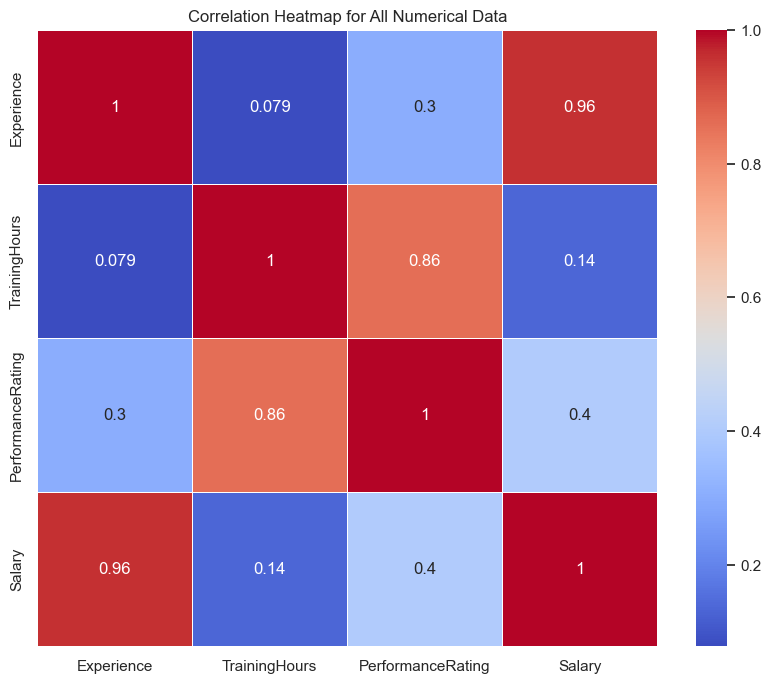

In [11]:
# Part Two
# Task 1: Identify Potential Predictor Variables

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create a heatmap for predictor variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Numerical Data')
plt.show()

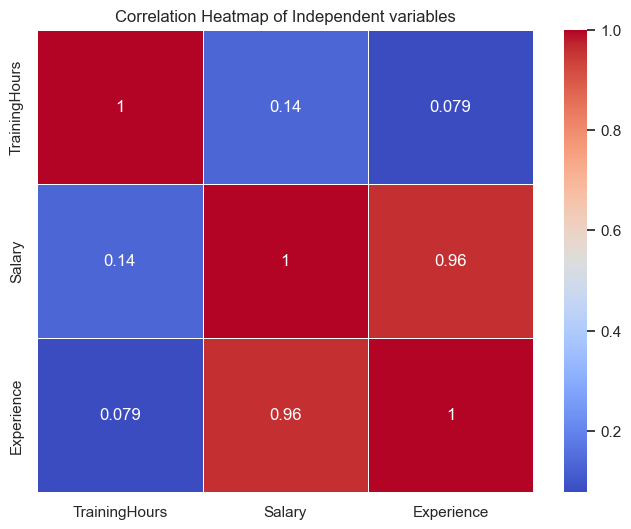

In [12]:
# Part Two
# Task 1: Identify Potential Predictor Variables

# Select independent variables
X = df[['TrainingHours', 'Salary', 'Experience']]
# Dependent variable
y = df['PerformanceRating']

corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Independent variables")
plt.show()

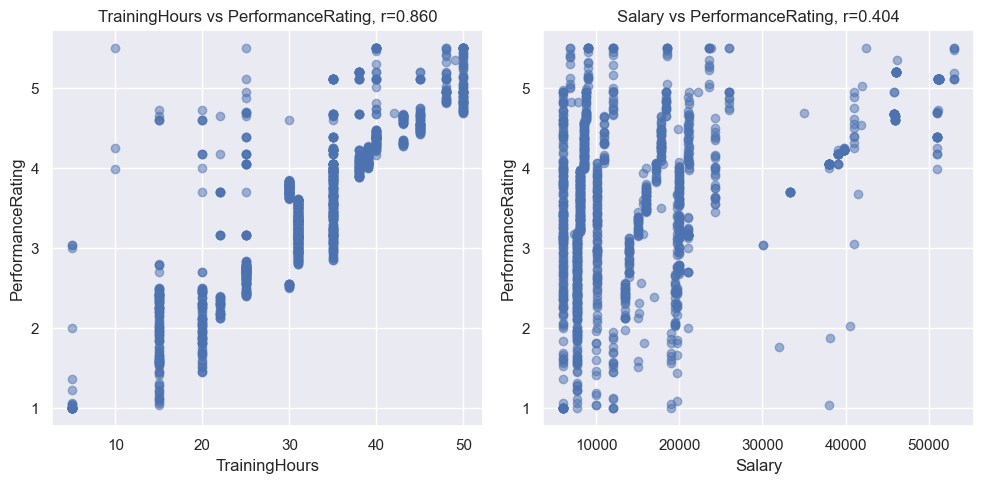

In [13]:
# Part Two
# Task 1: Identify Potential Predictor Variables

# Create scatterplots for each independent variable against the dependent variable
X = df[['TrainingHours', 'Salary']]
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(10, 5))


for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    r, p = stats.pearsonr(x=df[col], y=df['PerformanceRating'])
    axes[i].set_title(f'{col} vs PerformanceRating, {r=:.3f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('PerformanceRating')

plt.tight_layout()
plt.show()

In [15]:
# Part Two
# Task 3: Regression Analysis 

# Select final predictor variables (features) and the target variable (PerformanceRating):
# Select independent variables
X = df[['TrainingHours', 'Salary']]
# Dependent variable
y = df['PerformanceRating']

# create the model
# Add a constant term to the predictor variables
X = sm.add_constant(X)
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     3412.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:16:08   Log-Likelihood:                -874.98
No. Observations:                1468   AIC:                             1756.
Df Residuals:                    1465   BIC:                             1772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4306      0.040     10.861

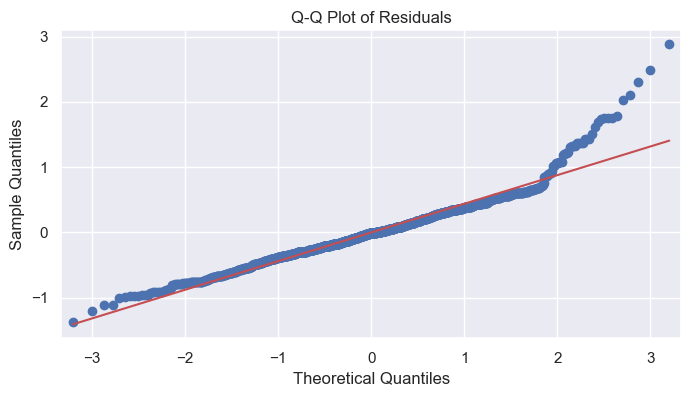

Anderson-Darling Statistic: 7.917607488034719
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [16]:
# Part Two
# Task 4: Assumptions of Linear Regression

# Get the residuals
residuals = model.resid

# Create a Q-Q plot to check for normality
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Perform the Anderson-Darling test for normality
result = stats.anderson(residuals, dist='norm')

# Extract the test statistic, critical values, and significance levels
ad_statistic = result.statistic
ad_critical_values = result.critical_values
ad_significance_levels = result.significance_level

print("Anderson-Darling Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)

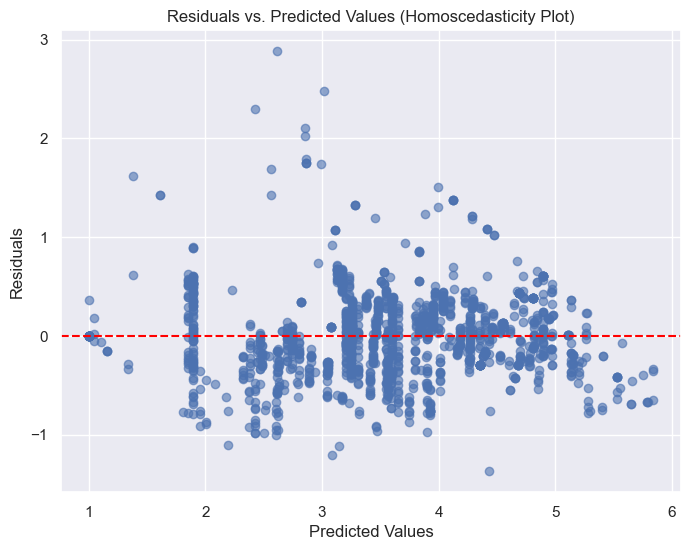

In [17]:
# Part Two
# Task 4: Assumptions of Linear Regression

# Homoscedasticity check
# Get the predicted (fitted) values from the model
predicted_values = model.fittedvalues

# Get the residuals from the model
residuals = model.resid

# Create a scatterplot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Homoscedasticity Plot)")
plt.show()
